<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>TransUnion Data Science and Analytics Challenge</h1>
</div>


#### Author:- Aniket B. Barphe
#### LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
#### Hackathon Platform:- HackerEarth
#### Date of Hackathon:- 10-19 June,2022
#### Problem Statement:- Given person's credit related information, build ML model to classify credit score

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [49]:

# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

plt.rcParams['figure.figsize']=(16,8)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [5]:
# train = pd.read_csv('C:/Users/PC/Pictures/HE/TU/train.csv')

# test = pd.read_csv('C:/Users/PC/Pictures/HE/TU/test.csv')

# submission = pd.read_csv('C:/Users/PC/Pictures/HE/TU/sample_submission.csv')

train = pd.read_csv('C:/Users/GGFSADMIN/Documents/HE/TU/train.csv')

test = pd.read_csv('C:/Users/GGFSADMIN/Documents/HE/TU/test.csv')

submission = pd.read_csv('C:/Users/GGFSADMIN/Documents/HE/TU/sample_submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [6]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")


Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan     

In [7]:
print("About Train Data:-\n")
print(train.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')

About Train Data:-

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Uti

In [8]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')

About Train Data:-

            ID Customer_ID   Month   Name Age          SSN Occupation  \
99995  0x25fe9  CUS_0x942c   April  Nicks  25  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c     May  Nicks  25  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c    June  Nicks  25  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c    July  Nicks  25  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c  August  Nicks  25  078-73-5990   Mechanic   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
99995      39628.99            3359.415833                  4  ...   
99996      39628.99            3359.415833                  4  ...   
99997      39628.99            3359.415833                  4  ...   
99998      39628.99            3359.415833                  4  ...   
99999     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
99995           _            502.38                34.66

In [9]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count    100000      100000   100000   90015  100000     100000     100000   
unique   100000       12500        8   10139    1788      12501         16   
top     0x16791  CUS_0x9e1e  January  Langep      38  #F%$D@*&8    _______   
freq          1           8    12500      44    2833       5572       7062   
mean        NaN         NaN      NaN     NaN     NaN        NaN        NaN   
std         NaN         NaN      NaN     NaN     NaN        NaN        NaN   
min         NaN         NaN      NaN     NaN     NaN        NaN        NaN   
25%         NaN         NaN      NaN     NaN     NaN        NaN        NaN   
50%         NaN         NaN      NaN     NaN     NaN        NaN        NaN   
75%         NaN         NaN      NaN     NaN     NaN        NaN        NaN   
max         NaN         NaN      NaN     NaN     NaN        NaN        NaN   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
count         100000           84998.000000      100000.000000  ...   
unique         18940                    NaN                NaN  ...   
top         17273.83                    NaN                NaN  ...   
freq              16                    NaN                NaN  ...   
mean             NaN            4194.170850          17.091280  ...   
std              NaN            3183.686167         117.404834  ...   
min              NaN             303.645417          -1.000000  ...   
25%              NaN            1625.568229           3.000000  ...   
50%              NaN            3093.745000           6.000000  ...   
75%              NaN            5957.448333           7.000000  ...   
max              NaN           15204.633333        1798.000000  ...   

        Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
count       100000            100000            100000.000000   
unique           4             13178                      NaN   
top       Standard           1360.45                      NaN   
freq         36479                24                      NaN   
mean           NaN               NaN                32.285173   
std            NaN               NaN                 5.116875   
min            NaN               NaN                20.000000   
25%            NaN               NaN                28.052567   
50%            NaN               NaN                32.305784   
75%            NaN               NaN                36.496663   
max            NaN               NaN                50.000000   

            Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
count                    90970                 100000       100000.000000   
unique                     404                      3                 NaN   
top     15 Years and 11 Months                    Yes                 NaN   
freq                       446                  52326                 NaN   
mean                       NaN                    NaN         1403.118217   
std                        NaN                    NaN         8306.041270   
min                        NaN                    NaN            0.000000   
25%                        NaN                    NaN           30.306660   
50%                        NaN                    NaN           69.249473   
75%                        NaN                    NaN          161.224249   
max                        NaN                    NaN        82331.000000   

       Amount_invested_monthly               Payment_Behaviour  \
count                    95521                          100000   
unique                   91049                               7   
top                  __10000__  Low_spent_Small_value_payments   
freq                      4305                           25513   
mean                       NaN                             NaN   
std                        NaN                             NaN   
min                        NaN                         

In [10]:
test.describe(include='all')

# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

ID Customer_ID     Month    Name    Age        SSN Occupation  \
count     50000       50000     50000   44985  50000      50000      50000   
unique    50000       12500         4   10139    976      12501         16   
top     0x15725  CUS_0x9e1e  December  Stevex     39  #F%$D@*&8    _______   
freq          1           4     12500      22   1493       2828       3438   
mean        NaN         NaN       NaN     NaN    NaN        NaN        NaN   
std         NaN         NaN       NaN     NaN    NaN        NaN        NaN   
min         NaN         NaN       NaN     NaN    NaN        NaN        NaN   
25%         NaN         NaN       NaN     NaN    NaN        NaN        NaN   
50%         NaN         NaN       NaN     NaN    NaN        NaN        NaN   
75%         NaN         NaN       NaN     NaN    NaN        NaN        NaN   
max         NaN         NaN       NaN     NaN    NaN        NaN        NaN   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
count          50000           42502.000000       50000.000000  ...   
unique         16121                    NaN                NaN  ...   
top         36585.12                    NaN                NaN  ...   
freq               8                    NaN                NaN  ...   
mean             NaN            4182.004291          16.838260  ...   
std              NaN            3174.109304         116.396848  ...   
min              NaN             303.645417          -1.000000  ...   
25%              NaN            1625.188333           3.000000  ...   
50%              NaN            3086.305000           6.000000  ...   
75%              NaN            5934.189094           7.000000  ...   
max              NaN           15204.633333        1798.000000  ...   

        Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
count           48965.000000       50000            50000   
unique                   NaN           4            12685   
top                      NaN    Standard           460.46   
freq                     NaN       18379               12   
mean               30.080200         NaN              NaN   
std               196.984121         NaN              NaN   
min                 0.000000         NaN              NaN   
25%                 4.000000         NaN              NaN   
50%                 7.000000         NaN              NaN   
75%                10.000000         NaN              NaN   
max              2593.000000         NaN              NaN   

       Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
count              50000.000000                  45530                 50000   
unique                      NaN                    399                     3   
top                         NaN  20 Years and 1 Months                   Yes   
freq                        NaN                    254                 26158   
mean                  32.279581                    NaN                   NaN   
std                    5.106238                    NaN                   NaN   
min                   20.509652                    NaN                   NaN   
25%                   28.061040                    NaN                   NaN   
50%                   32.280390                    NaN                   NaN   
75%                   36.468591                    NaN                   NaN   
max                   48.540663                    NaN                   NaN   

       Total_EMI_per_month  Amount_invested_monthly  \
count         50000.000000                    47729   
unique                 NaN                    45450   
top                    NaN                __10000__   
freq                   NaN                     2175   
mean           1491.304305                      NaN   
std            8595.647887                      NaN   
min               0.000000                      NaN   
25%              32.222388                      NaN   
50%              74.733349        

In [11]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




Missing Values  Percentage Missing Values
ID                                     0                      0.000
Customer_ID                            0                      0.000
Month                                  0                      0.000
Name                                9985                      9.985
Age                                    0                      0.000
SSN                                    0                      0.000
Occupation                             0                      0.000
Annual_Income                          0                      0.000
Monthly_Inhand_Salary              15002                     15.002
Num_Bank_Accounts                      0                      0.000
Num_Credit_Card                        0                      0.000
Interest_Rate                          0                      0.000
Num_of_Loan                            0                      0.000
Type_of_Loan                       11408                     11.408
Delay_from_due_date                    0                      0.000
Num_of_Delayed_Payment              7002                      7.002
Changed_Credit_Limit                   0                      0.000
Num_Credit_Inquiries                1965                      1.965
Credit_Mix                             0                      0.000
Outstanding_Debt                       0                      0.000
Credit_Utilization_Ratio               0                      0.000
Credit_History_Age                  9030                      9.030
Payment_of_Min_Amount                  0                      0.000
Total_EMI_per_month                    0                      0.000
Amount_invested_monthly             4479                      4.479
Payment_Behaviour                      0                      0.000
Monthly_Balance                     1200                      1.200
Credit_Score                           0                      0.000

In [12]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




Missing Values  Percentage Missing Values
ID                                     0                      0.000
Customer_ID                            0                      0.000
Month                                  0                      0.000
Name                                5015                     10.030
Age                                    0                      0.000
SSN                                    0                      0.000
Occupation                             0                      0.000
Annual_Income                          0                      0.000
Monthly_Inhand_Salary               7498                     14.996
Num_Bank_Accounts                      0                      0.000
Num_Credit_Card                        0                      0.000
Interest_Rate                          0                      0.000
Num_of_Loan                            0                      0.000
Type_of_Loan                        5704                     11.408
Delay_from_due_date                    0                      0.000
Num_of_Delayed_Payment              3498                      6.996
Changed_Credit_Limit                   0                      0.000
Num_Credit_Inquiries                1035                      2.070
Credit_Mix                             0                      0.000
Outstanding_Debt                       0                      0.000
Credit_Utilization_Ratio               0                      0.000
Credit_History_Age                  4470                      8.940
Payment_of_Min_Amount                  0                      0.000
Total_EMI_per_month                    0                      0.000
Amount_invested_monthly             2271                      4.542
Payment_Behaviour                      0                      0.000
Monthly_Balance                      562                      1.124

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Preprocessing of Train DataSet</h2>
</div>

- Handling "Month" Variable
- Handling "Occupation" Variable 
- Handling "Credit_Score" Variable 
- Handling "Payment_Behaviour" Variable 
- Handling "Credit_Mix" Variable 
- Handling "Payment_of_Min_Amount" Variable 
- Handling "Age" Variable 
- Handling "Num_of_Delayed_Payment" Variable 
- Handling "Delay_from_due_date" Variable 
- Handling "Num_Bank_Accounts" Variable 
- Handling "Num_of_Loan" Variable 
- Handling "Changed_Credit_Limit" Variable 
- Handling "Annual_Income" Variable 
- Handling "Amount_invested_monthly" Variable 
- Handling "Outstanding_Debt" Variable 
- Handling "Credit_History_Age" Variable 


#### * Handling of "Month" Variable

In [13]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Month************In TRAIN Data************************************************************")


train['Month'].value_counts()

train['Month'] = train['Month'].map({'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7})

#print(train['Month'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Month************In TRAIN Data************************************************************


#### * Handling of "Occupation" Variable

In [14]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Occupation************In TRAIN Data************************************************************")

train['Occupation'].value_counts()

train['Occupation'] = train['Occupation'].map({'Lawyer':0, 'Architect':1, 'Engineer':2, 'Scientist':3, 
                                               'Mechanic':4, 'Accountant':5, 'Developer':6, 'Media_Manager':7, 'Teacher':8
                                              , 'Entrepreneur':9, 'Doctor':10, 'Journalist':11
                                              , 'Manager':12, 'Musician':13, 'Writer':14})

#print(train['Occupation'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Occupation************In TRAIN Data************************************************************


#### * Handling of "Credit_Score" Variable

In [15]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Credit_Score************In TRAIN Data************************************************************")

train['Credit_Score'].value_counts()

train['Credit_Score'] = train['Credit_Score'].map({'Standard':0, 'Poor':1, 'Good':2})

#print(train['Credit_Score'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Credit_Score************In TRAIN Data************************************************************


#### * Handling of "Payment_Behaviour" Variable

In [16]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Payment_Behaviour************In TRAIN Data************************************************************")

train['Payment_Behaviour'].value_counts()

train['Payment_Behaviour'] = train['Payment_Behaviour'].map({'Low_spent_Small_value_payments':0
                                                             , 'High_spent_Medium_value_payments':1
                                                             , 'Low_spent_Medium_value_payments':2
                                                             , 'High_spent_Large_value_payments':3
                                                             ,'High_spent_Small_value_payments':4
                                                             , 'Low_spent_Large_value_payments':5})

#print(train['Payment_Behaviour'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Payment_Behaviour************In TRAIN Data************************************************************


#### * Handling of "Credit_Mix" Variable

In [17]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Credit_Mix************In TRAIN Data************************************************************")

train['Credit_Mix'].value_counts()

train['Credit_Mix'] = train['Credit_Mix'].map({'Standard':0, 'Good':1, 'Bad':2})

#print(train['Credit_Mix'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Credit_Mix************In TRAIN Data************************************************************


#### * Handling of "Payment_of_Min_Amount" Variable

In [18]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Payment_of_Min_Amount************In TRAIN Data************************************************************")

train['Payment_of_Min_Amount'].value_counts()

train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].map({'Yes':0, 'No':1, 'NM':2})

#print(train['Payment_of_Min_Amount'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Payment_of_Min_Amount************In TRAIN Data************************************************************


#### * Handling of "Age" Variable

In [19]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Age************In TRAIN Data************************************************************")

for i in range(len(train['Age'])):
    if '_' in train['Age'][i]:
        train['Age'][i]=train['Age'][i][:-1]
        
train['Age']=train['Age'].astype('int')

# Negative Age Fill with Average Value of Population (18 < Age < 70)
train['Age'] = np.where((train['Age'] < 0), 35, train['Age'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Age************In TRAIN Data************************************************************


#### * Handling of "Num_of_Delayed_Payment" Variable

In [20]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Num_of_Delayed_Payment************In TRAIN Data*********************************************")

train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].str.split('_',expand=True)[0]
train['Num_of_Delayed_Payment']=train['Num_of_Delayed_Payment'].str.replace('nan','0')

-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_of_Delayed_Payment************In TRAIN Data*********************************************


#### * Handling of "Delay_from_due_date" Variable

In [21]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Delay_from_due_date************In TRAIN Data*********************************************")
train['Delay_from_due_date']

train['Delay_from_due_date']=train['Delay_from_due_date'].replace('-',np.nan)
      

-------------------------------------------------------------------------------------------------------------------
****************Variable = Delay_from_due_date************In TRAIN Data*********************************************


#### * Handling of "Num_Bank_Accounts" Variable

In [22]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Num_Bank_Accounts************In TRAIN Data*********************************************")

train['Num_Bank_Accounts']
# Replace Negative With 1
#train['Num_Bank_Accounts'] = np.where(((train['Num_Bank_Accounts']) < 0 & (train['Num_of_Loan'] > 0)), 1, train['Num_Bank_Accounts'])
# Replace Negative with 0
#train['Num_Bank_Accounts'] = np.where((train['Num_Bank_Accounts'] < 0), 0, train['Num_Bank_Accounts'])



-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_Bank_Accounts************In TRAIN Data*********************************************


0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 100000, dtype: int64

#### * Handling of "Num_of_Loan" Variable

In [23]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Num_of_Loan************In TRAIN Data*********************************************")

for i in range(len(train['Num_of_Loan'])):
    if '_' in train['Num_of_Loan'][i]:
        train['Num_of_Loan'][i]=train['Num_of_Loan'][i][:-1]
        

train['Num_of_Loan'].dtypes

train['Num_of_Loan'] = train['Num_of_Loan'].astype('float')

train['Num_of_Loan'] = np.where(((train['Num_of_Loan'] < 0) & (train['Type_of_Loan'] == '')), 0, train['Num_of_Loan'])
# Fill with Average of Population i.e. 7
train['Num_of_Loan'] = np.where(((train['Num_of_Loan'] < 0) & (train['Type_of_Loan'] != '')), 7, train['Num_of_Loan'])

print("-------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_of_Loan************In TRAIN Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Changed_Credit_Limit" Variable

In [24]:
print("****************Variable = Changed_Credit_Limit************In TRAIN Data*********************************************")

for i in range(len(train['Changed_Credit_Limit'])):
    if '_' in train['Changed_Credit_Limit'][i]:
        train['Changed_Credit_Limit'][i]=train['Changed_Credit_Limit'][i][:-1]

print("-------------------------------------------------------------------------------------------------------------------")


****************Variable = Changed_Credit_Limit************In TRAIN Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Annual_Income" Variable

In [25]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Annual_Income************In Train Data*********************************************")


for i in range(len(train['Annual_Income'])):
    if '_' in train['Annual_Income'][i]:
        train['Annual_Income'][i]=train['Annual_Income'][i][:-1]

# Cross verify above replacement

# for i in range(len(train['Annual_Income'])):
#     if '_' in train['Annual_Income'][i]:
#         print('True')

train['Annual_Income']=train['Annual_Income'].astype('float64')
print("-------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------
****************Variable = Annual_Income************In Train Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Amount_invested_monthly" Variable

In [26]:
print("****************Variable = Amount_invested_monthly************In TRAIN Data*********************************************")


print(train['Amount_invested_monthly'])


train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.split('_',expand=True)[0]
print("-------------------------------------------------------------------------------------------------------------------")


****************Variable = Amount_invested_monthly************In TRAIN Data*********************************************
0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 100000, dtype: object
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Outstanding_Debt" Variable

In [27]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable =Outstanding_Debt************In train Data*********************************************")


for i in range(len(train['Outstanding_Debt'])):
    if '_' in train['Outstanding_Debt'][i]:
        train['Outstanding_Debt'][i]=train['Outstanding_Debt'][i][:-1]

# Cross verify above replacement
# for i in range(len(test['Outstanding_Debt'])):
#     if '_' in test['Outstanding_Debt'][i]:
#         print("True")
        
print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
****************Variable =Outstanding_Debt************In train Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Credit_History_Age" Variable

In [28]:

# Proper formatting of "Credit_History_Age" Categorical Variable in "TRAIN" Dataset
print(train['Credit_History_Age'])

print("-----------------------------------------------------------------------------------------------------------------")
# Extract "Numerical year" Value from "Credit_History_Age" Variable of "Train Data"
year_value_train = train['Credit_History_Age'].str.split('Years',expand=True)[0]

print(year_value_train)

print("-----------------------------------------------------------------------------------------------------------------")

print("How many Null Values are there in the YEAR Sepearted Column?:-\n\n",year_value_train.isnull().sum())
# Replace "NaN" with "0" after seperating the "Year" value from the "Credit_History_Age"
year_value_train = year_value_train.replace(np.nan,'0')
# Convert into "int64" datatype
year_value_train = year_value_train.astype('int64')
print(year_value_train.head())

print("Check Null Values in the YEAR Sepearted Column After replacement:-\n\n",year_value_train.isnull().sum())

print("-----------------------------------------------------------------------------------------------------------------")

# Extract "Numerical Month" Value from "Credit_History_Age" Variable of "Train Data"
xx = train['Credit_History_Age'].str.split('Years and',expand=True)[1]
month_value_train = xx.str.split('Months',expand=True)[0]
print(month_value_train.head())


print("-----------------------------------------------------------------------------------------------------------------")

print("How many Null Values are there in the MONTH Sepearted Column?:-\n\n",month_value_train.isnull().sum())
# Replace "NaN" with "0" after seperating the "Month" value from the "Credit_History_Age"
month_value_train = month_value_train.replace(np.nan,'0')
# Convert into "int64" datatype
month_value_train = month_value_train.astype('int64')

print("Check Null Values in the MONTH Sepearted Column After replacement:-\n\n",month_value_train.isnull().sum())

print("-----------------------------------------------------------------------------------------------------------------")

# Convert Year & Months in terms of Month Only
Credit_History_Age_FINAL_TRAIN = (year_value_train)*12 + month_value_train
print("Credit_History_Age Variable from TRAIN Data in terms of Month Only:-\n\n",Credit_History_Age_FINAL_TRAIN)

print("-----------------------------------------------------------------------------------------------------------------")


# Convert to dataframe with Column name "Duration"
Credit_History_Age_FINAL_TRAIN = pd.Series(Credit_History_Age_FINAL_TRAIN,name='Credit_History_Age_Months')

print("-----------------------------------------------------------------------------------------------------------------")

# Include derived column "Credit_History_Age_Months" in Original "Train" Data
train = pd.concat([train,Credit_History_Age_FINAL_TRAIN], axis=1) # Final Test DataSet
train.head()



0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object
-----------------------------------------------------------------------------------------------------------------
0        22 
1        NaN
2        22 
3        22 
4        22 
        ... 
99995    31 
99996    31 
99997    31 
99998    31 
99999    31 
Name: 0, Length: 100000, dtype: object
-----------------------------------------------------------------------------------------------------------------
How many Null Values are there in the YEAR Sepearted Column?:-

 9030
0    22
1     0
2    22
3    22
4    22
Name: 0, dtype: int64
Check Null Values in the YEAR Sepearted Column Aft

ID Customer_ID  Month           Name  Age          SSN  Occupation  \
0  0x1602   CUS_0xd40      0  Aaron Maashoh   23  821-00-0265         3.0   
1  0x1603   CUS_0xd40      1  Aaron Maashoh   23  821-00-0265         3.0   
2  0x1604   CUS_0xd40      2  Aaron Maashoh   35  821-00-0265         3.0   
3  0x1605   CUS_0xd40      3  Aaron Maashoh   23  821-00-0265         3.0   
4  0x1606   CUS_0xd40      4  Aaron Maashoh   23  821-00-0265         3.0   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12                    NaN                  3  ...   
2       19114.12                    NaN                  3  ...   
3       19114.12                    NaN                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 Years and 1 Months   
1            809.98                 31.944960                    NaN   
2            809.98                 28.609352  22 Years and 3 Months   
3            809.98                 31.377862  22 Years and 4 Months   
4            809.98                 24.797347  22 Years and 5 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                     1            49.574949       80.41529543900253   
1                     1            49.574949      118.28022162236736   
2                     1            49.574949         81.699521264648   
3                     1            49.574949       199.4580743910713   
4                     1            49.574949      41.420153086217326   

  Payment_Behaviour     Monthly_Balance  Credit_Score  \
0               4.0  312.49408867943663             2   
1               5.0  284.62916249607184             2   
2               2.0   331.2098628537912             2   
3               0.0  223.45130972736786             2   
4               1.0  341.48923103222177             2   

  Credit_History_Age_Months  
0                       265  
1                         0  
2                       267  
3                       268  
4                       269  

[5 rows x 29 columns]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Preprocessing of Test DataSet</h2>
</div>

- Handling "Month" Variable 
- Handling "Occupation" Variable 
- Handling "Payment_Behaviour" Variable 
- Handling "Credit_Mix" Variable 
- Handling "Payment_of_Min_Amount" Variable 
- Handling "Age" Variable 
- Handling "Num_of_Delayed_Payment" Variable 
- Handling "Delay_from_due_date" Variable 
- Handling "Num_Bank_Accounts" Variable 
- Handling "Num_of_Loan" Variable 
- Handling "Changed_Credit_Limit" Variable 
- Handling "Annual_Income" Variable 
- Handling "Amount_invested_monthly" Variable 
- Handling "Outstanding_Debt" Variable 
- Handling "Credit_History_Age" Variable 


#### * Handling of "Month" Variable

In [29]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Month************In test Data************************************************************")


test['Month'].value_counts()

test['Month'] = test['Month'].map({'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7})

#print(test['Month'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Month************In test Data************************************************************


#### * Handling of "Occupation" Variable

In [30]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Occupation************In test Data************************************************************")

test['Occupation'].value_counts()

test['Occupation'] = test['Occupation'].map({'Lawyer':0, 'Architect':1, 'Engineer':2, 'Scientist':3, 
                                               'Mechanic':4, 'Accountant':5, 'Developer':6, 'Media_Manager':7, 'Teacher':8
                                              , 'Entrepreneur':9, 'Doctor':10, 'Journalist':11
                                              , 'Manager':12, 'Musician':13, 'Writer':14})

#print(test['Occupation'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Occupation************In test Data************************************************************


#### * Handling of "Payment_Behaviour" Variable

In [31]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Payment_Behaviour************In test Data************************************************************")

test['Payment_Behaviour'].value_counts()

test['Payment_Behaviour'] = test['Payment_Behaviour'].map({'Low_spent_Small_value_payments':0
                                                             , 'High_spent_Medium_value_payments':1
                                                             , 'Low_spent_Medium_value_payments':2
                                                             , 'High_spent_Large_value_payments':3
                                                             ,'High_spent_Small_value_payments':4
                                                             , 'Low_spent_Large_value_payments':5})

#print(test['Payment_Behaviour'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Payment_Behaviour************In test Data************************************************************


#### * Handling of "Credit_Mix" Variable

In [32]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Credit_Mix************In test Data************************************************************")

test['Credit_Mix'].value_counts()

test['Credit_Mix'] = test['Credit_Mix'].map({'Standard':0, 'Good':1, 'Bad':2})

#print(test['Credit_Mix'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Credit_Mix************In test Data************************************************************


#### * Handling of "Payment_of_Min_Amount" Variable

In [33]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Payment_of_Min_Amount************In test Data************************************************************")

test['Payment_of_Min_Amount'].value_counts()

test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].map({'Yes':0, 'No':1, 'NM':2})

#print(test['Payment_of_Min_Amount'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Payment_of_Min_Amount************In test Data************************************************************


#### * Handling of "Age" Variable

In [34]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Age************In test Data************************************************************")

for i in range(len(test['Age'])):
    if '_' in test['Age'][i]:
        test['Age'][i]=test['Age'][i][:-1]
        
test['Age']=test['Age'].astype('int')

# Negative Age Fill with Average Value of Population (18 < Age < 70)
test['Age'] = np.where((test['Age'] < 0), 35, test['Age'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Age************In test Data************************************************************


#### * Handling of "Num_of_Delayed_Payment" Variable

In [35]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Num_of_Delayed_Payment************In test Data*********************************************")

test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].str.split('_',expand=True)[0]
test['Num_of_Delayed_Payment']=test['Num_of_Delayed_Payment'].str.replace('nan','0')

-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_of_Delayed_Payment************In test Data*********************************************


#### * Handling of "Delay_from_due_date" Variable

In [36]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Delay_from_due_date************In test Data*********************************************")
test['Delay_from_due_date']

test['Delay_from_due_date']=test['Delay_from_due_date'].replace('-',np.nan)
      

-------------------------------------------------------------------------------------------------------------------
****************Variable = Delay_from_due_date************In test Data*********************************************


#### * Handling of "Num_Bank_Accounts" Variable

In [37]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Num_Bank_Accounts************In test Data*********************************************")

test['Num_Bank_Accounts']
# Replace Negative With 1
#test['Num_Bank_Accounts'] = np.where(((test['Num_Bank_Accounts']) < 0 & (test['Num_of_Loan'] > 0)), 1, test['Num_Bank_Accounts'])
# Replace Negative with 0
#test['Num_Bank_Accounts'] = np.where((test['Num_Bank_Accounts'] < 0), 0, test['Num_Bank_Accounts'])



-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_Bank_Accounts************In test Data*********************************************


0         3
1         3
2         3
3         3
4         2
         ..
49995    10
49996     4
49997     4
49998     4
49999     4
Name: Num_Bank_Accounts, Length: 50000, dtype: int64

#### * Handling of "Num_of_Loan" Variable

In [38]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Num_of_Loan************In test Data*********************************************")

for i in range(len(test['Num_of_Loan'])):
    if '_' in test['Num_of_Loan'][i]:
        test['Num_of_Loan'][i]=test['Num_of_Loan'][i][:-1]
        

test['Num_of_Loan'].dtypes

test['Num_of_Loan'] = test['Num_of_Loan'].astype('float')

test['Num_of_Loan'] = np.where(((test['Num_of_Loan'] < 0) & (test['Type_of_Loan'] == '')), 0, test['Num_of_Loan'])
# Fill with Average of Population i.e. 7
test['Num_of_Loan'] = np.where(((test['Num_of_Loan'] < 0) & (test['Type_of_Loan'] != '')), 7, test['Num_of_Loan'])

print("-------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------
****************Variable = Num_of_Loan************In test Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Changed_Credit_Limit" Variable

In [39]:
print("****************Variable = Changed_Credit_Limit************In test Data*********************************************")

for i in range(len(test['Changed_Credit_Limit'])):
    if '_' in test['Changed_Credit_Limit'][i]:
        test['Changed_Credit_Limit'][i]=test['Changed_Credit_Limit'][i][:-1]

print("-------------------------------------------------------------------------------------------------------------------")


****************Variable = Changed_Credit_Limit************In test Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Annual_Income" Variable

In [40]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable = Annual_Income************In test Data*********************************************")


for i in range(len(test['Annual_Income'])):
    if '_' in test['Annual_Income'][i]:
        test['Annual_Income'][i]=test['Annual_Income'][i][:-1]

# Cross verify above replacement

# for i in range(len(test['Annual_Income'])):
#     if '_' in test['Annual_Income'][i]:
#         print('True')

test['Annual_Income']=test['Annual_Income'].astype('float64')
print("-------------------------------------------------------------------------------------------------------------------")


-------------------------------------------------------------------------------------------------------------------
****************Variable = Annual_Income************In test Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Amount_invested_monthly" Variable

In [41]:
print("****************Variable = Amount_invested_monthly************In test Data*********************************************")


print(test['Amount_invested_monthly'])


test['Amount_invested_monthly'] = test['Amount_invested_monthly'].str.split('_',expand=True)[0]
print("-------------------------------------------------------------------------------------------------------------------")


****************Variable = Amount_invested_monthly************In test Data*********************************************
0        236.64268203272135
1        21.465380264657146
2        148.23393788500925
3         39.08251089460281
4        39.684018417945296
                ...        
49995    146.48632477751087
49996    181.44299902757518
49997             __10000__
49998     97.59857973344877
49999    220.45787812168732
Name: Amount_invested_monthly, Length: 50000, dtype: object
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Outstanding_Debt" Variable

In [42]:
print("-------------------------------------------------------------------------------------------------------------------")

print("****************Variable =Outstanding_Debt************In test Data*********************************************")


for i in range(len(test['Outstanding_Debt'])):
    if '_' in test['Outstanding_Debt'][i]:
        test['Outstanding_Debt'][i]=test['Outstanding_Debt'][i][:-1]

# Cross verify above replacement
# for i in range(len(test['Outstanding_Debt'])):
#     if '_' in test['Outstanding_Debt'][i]:
#         print("True")
        
print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
****************Variable =Outstanding_Debt************In test Data*********************************************
-------------------------------------------------------------------------------------------------------------------


#### * Handling of "Credit_History_Age" Variable

In [43]:

# Proper formatting of "Credit_History_Age" Categorical Variable in "test" Dataset
print(test['Credit_History_Age'])

print("-----------------------------------------------------------------------------------------------------------------")
# Extract "Numerical year" Value from "Credit_History_Age" Variable of "test Data"
year_value_test = test['Credit_History_Age'].str.split('Years',expand=True)[0]

print(year_value_test)

print("-----------------------------------------------------------------------------------------------------------------")

print("How many Null Values are there in the YEAR Sepearted Column?:-\n\n",year_value_test.isnull().sum())
# Replace "NaN" with "0" after seperating the "Year" value from the "Credit_History_Age"
year_value_test = year_value_test.replace(np.nan,'0')
# Convert into "int64" datatype
year_value_test = year_value_test.astype('int64')
print(year_value_test.head())

print("Check Null Values in the YEAR Sepearted Column After replacement:-\n\n",year_value_test.isnull().sum())

print("-----------------------------------------------------------------------------------------------------------------")

# Extract "Numerical Month" Value from "Credit_History_Age" Variable of "test Data"
xx = test['Credit_History_Age'].str.split('Years and',expand=True)[1]
month_value_test = xx.str.split('Months',expand=True)[0]
print(month_value_test.head())


print("-----------------------------------------------------------------------------------------------------------------")

print("How many Null Values are there in the MONTH Sepearted Column?:-\n\n",month_value_test.isnull().sum())
# Replace "NaN" with "0" after seperating the "Month" value from the "Credit_History_Age"
month_value_test = month_value_test.replace(np.nan,'0')
# Convert into "int64" datatype
month_value_test = month_value_test.astype('int64')

print("Check Null Values in the MONTH Sepearted Column After replacement:-\n\n",month_value_test.isnull().sum())

print("-----------------------------------------------------------------------------------------------------------------")

# Convert Year & Months in terms of Month Only
Credit_History_Age_FINAL_test = (year_value_test)*12 + month_value_test
print("Credit_History_Age Variable from test Data in terms of Month Only:-\n\n",Credit_History_Age_FINAL_test)

print("-----------------------------------------------------------------------------------------------------------------")


# Convert to dataframe with Column name "Duration"
Credit_History_Age_FINAL_test = pd.Series(Credit_History_Age_FINAL_test,name='Credit_History_Age_Months')

print("-----------------------------------------------------------------------------------------------------------------")

# Include derived column "Credit_History_Age_Months" in Original "test" Data
test = pd.concat([test,Credit_History_Age_FINAL_test], axis=1) # Final Test DataSet
test.head()


0         22 Years and 9 Months
1        22 Years and 10 Months
2                           NaN
3         23 Years and 0 Months
4         27 Years and 3 Months
                  ...          
49995                       NaN
49996    31 Years and 11 Months
49997     32 Years and 0 Months
49998     32 Years and 1 Months
49999     32 Years and 2 Months
Name: Credit_History_Age, Length: 50000, dtype: object
-----------------------------------------------------------------------------------------------------------------
0        22 
1        22 
2        NaN
3        23 
4        27 
        ... 
49995    NaN
49996    31 
49997    32 
49998    32 
49999    32 
Name: 0, Length: 50000, dtype: object
-----------------------------------------------------------------------------------------------------------------
How many Null Values are there in the YEAR Sepearted Column?:-

 4470
0    22
1    22
2     0
3    23
4    27
Name: 0, dtype: int64
Check Null Values in the YEAR Sepearted Column After

ID Customer_ID  Month             Name  Age          SSN  Occupation  \
0  0x160a   CUS_0xd40    NaN    Aaron Maashoh   23  821-00-0265         3.0   
1  0x160b   CUS_0xd40    NaN    Aaron Maashoh   24  821-00-0265         3.0   
2  0x160c   CUS_0xd40    NaN    Aaron Maashoh   24  821-00-0265         3.0   
3  0x160d   CUS_0xd40    NaN    Aaron Maashoh   24  821-00-0265         3.0   
4  0x1616  CUS_0x21b1    NaN  Rick Rothackerj   28  004-07-5839         NaN   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...         1.0   
1       19114.12            1824.843333                  3  ...         1.0   
2       19114.12            1824.843333                  3  ...         1.0   
3       19114.12                    NaN                  3  ...         1.0   
4       34847.84            3037.986667                  2  ...         1.0   

   Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
0            809.98                 35.030402   22 Years and 9 Months   
1            809.98                 33.053114  22 Years and 10 Months   
2            809.98                 33.811894                     NaN   
3            809.98                 32.430559   23 Years and 0 Months   
4            605.03                 25.926822   27 Years and 3 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                      1           49.574949      236.64268203272135   
1                      1           49.574949      21.465380264657146   
2                      1           49.574949      148.23393788500925   
3                      1           49.574949       39.08251089460281   
4                      1           18.816215      39.684018417945296   

   Payment_Behaviour     Monthly_Balance Credit_History_Age_Months  
0                0.0  186.26670208571772                       273  
1                1.0  361.44400385378196                       274  
2                2.0  264.67544623342997                         0  
3                1.0  343.82687322383634                       276  
4                3.0   485.2984336755923                       327  

[5 rows x 28 columns]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Visualization of Train DataSet</h2>
</div>


<AxesSubplot:xlabel='Age', ylabel='Density'>

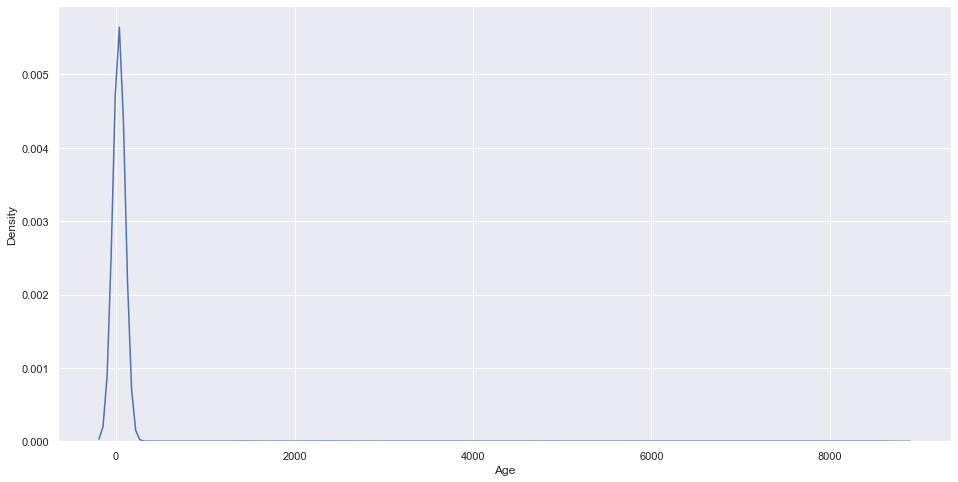

In [50]:
sns.kdeplot(train.Age)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

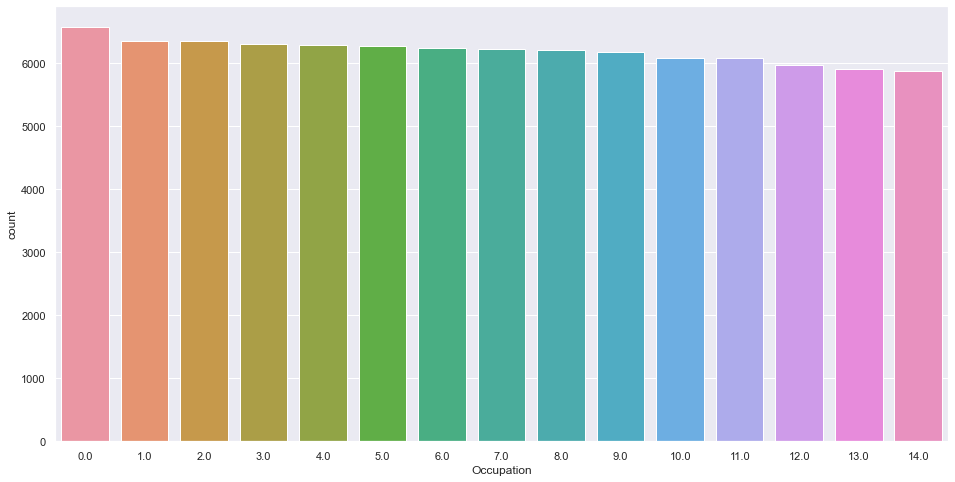

In [51]:
sns.countplot(train['Occupation'])

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Density'>

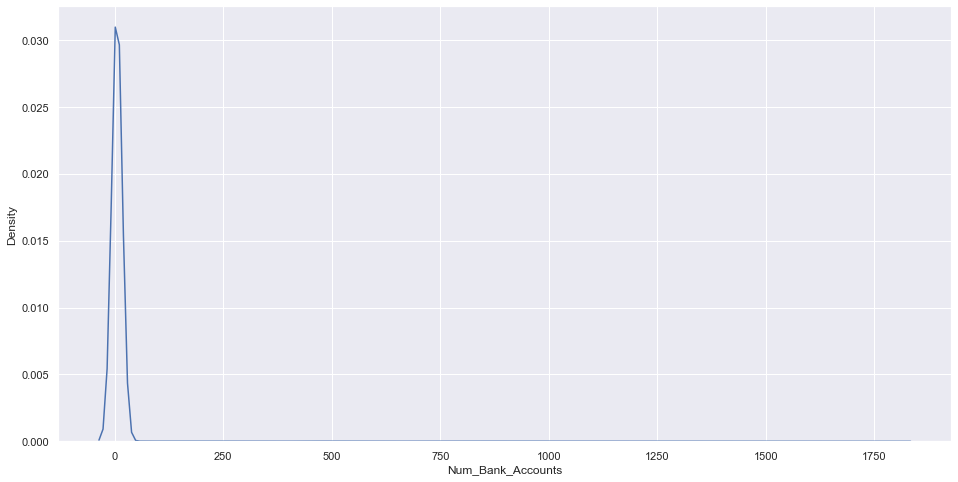

In [52]:
sns.kdeplot(train['Num_Bank_Accounts'])

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

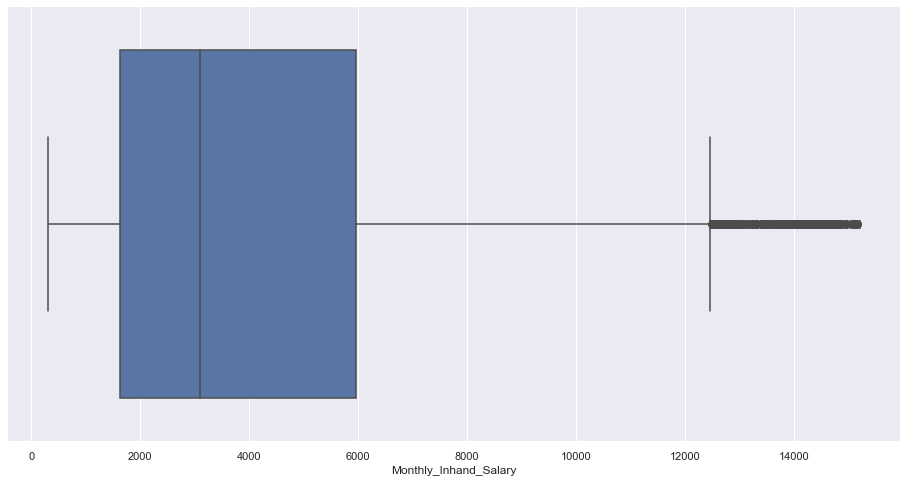

In [53]:
sns.boxplot(train['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

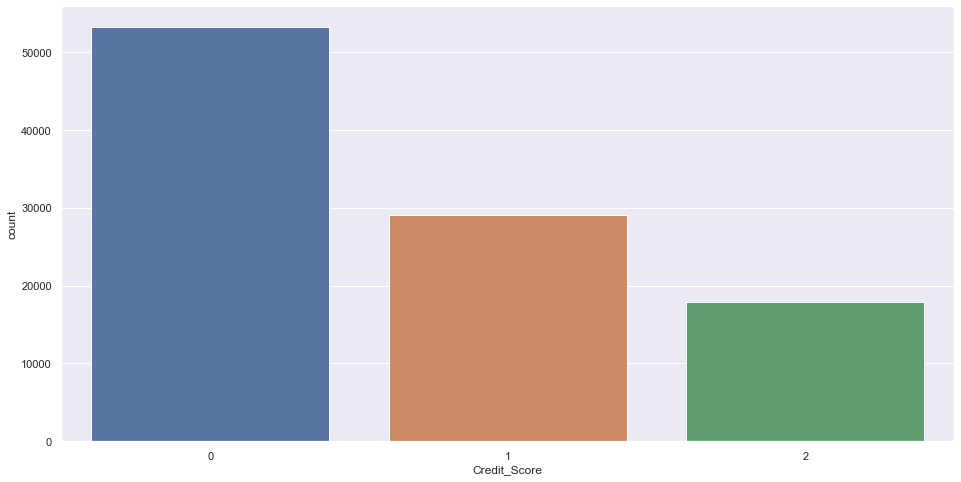

In [54]:
sns.countplot(train['Credit_Score'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

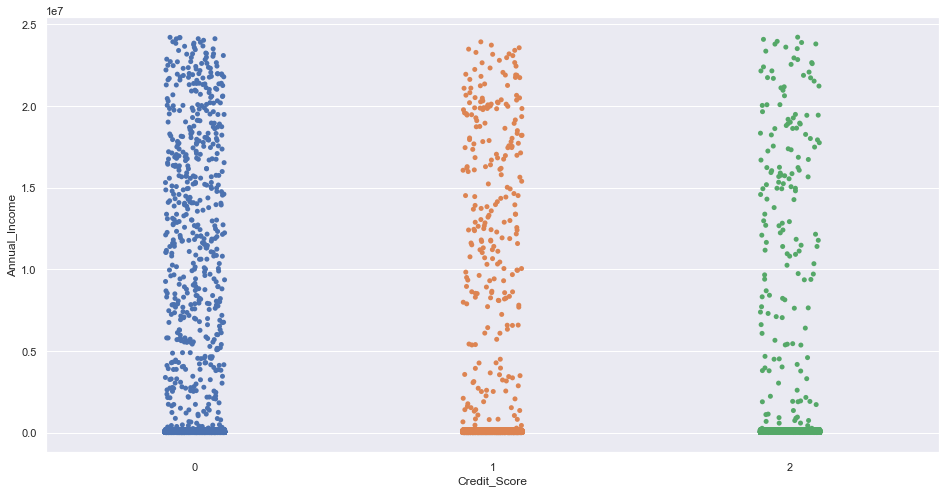

In [55]:
sns.stripplot(x=train['Credit_Score'],y=train['Annual_Income'])

<AxesSubplot:xlabel='Interest_Rate'>

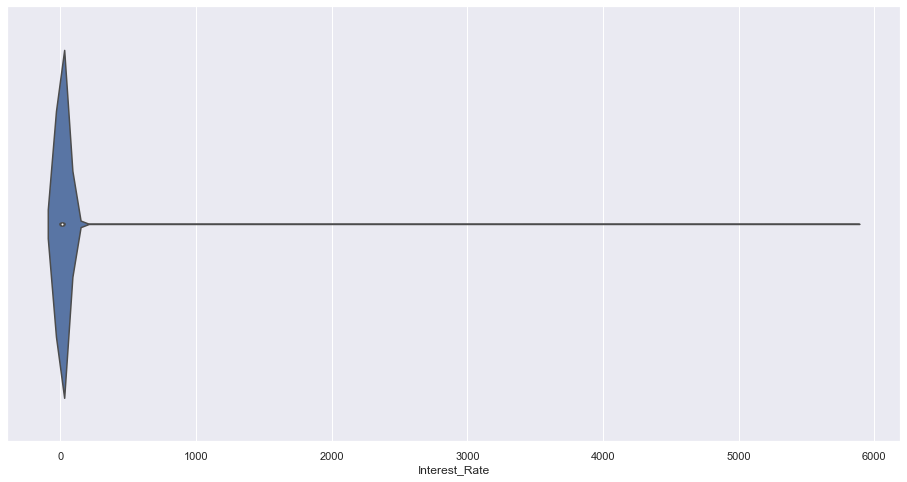

In [56]:
sns.violinplot(train['Interest_Rate'])

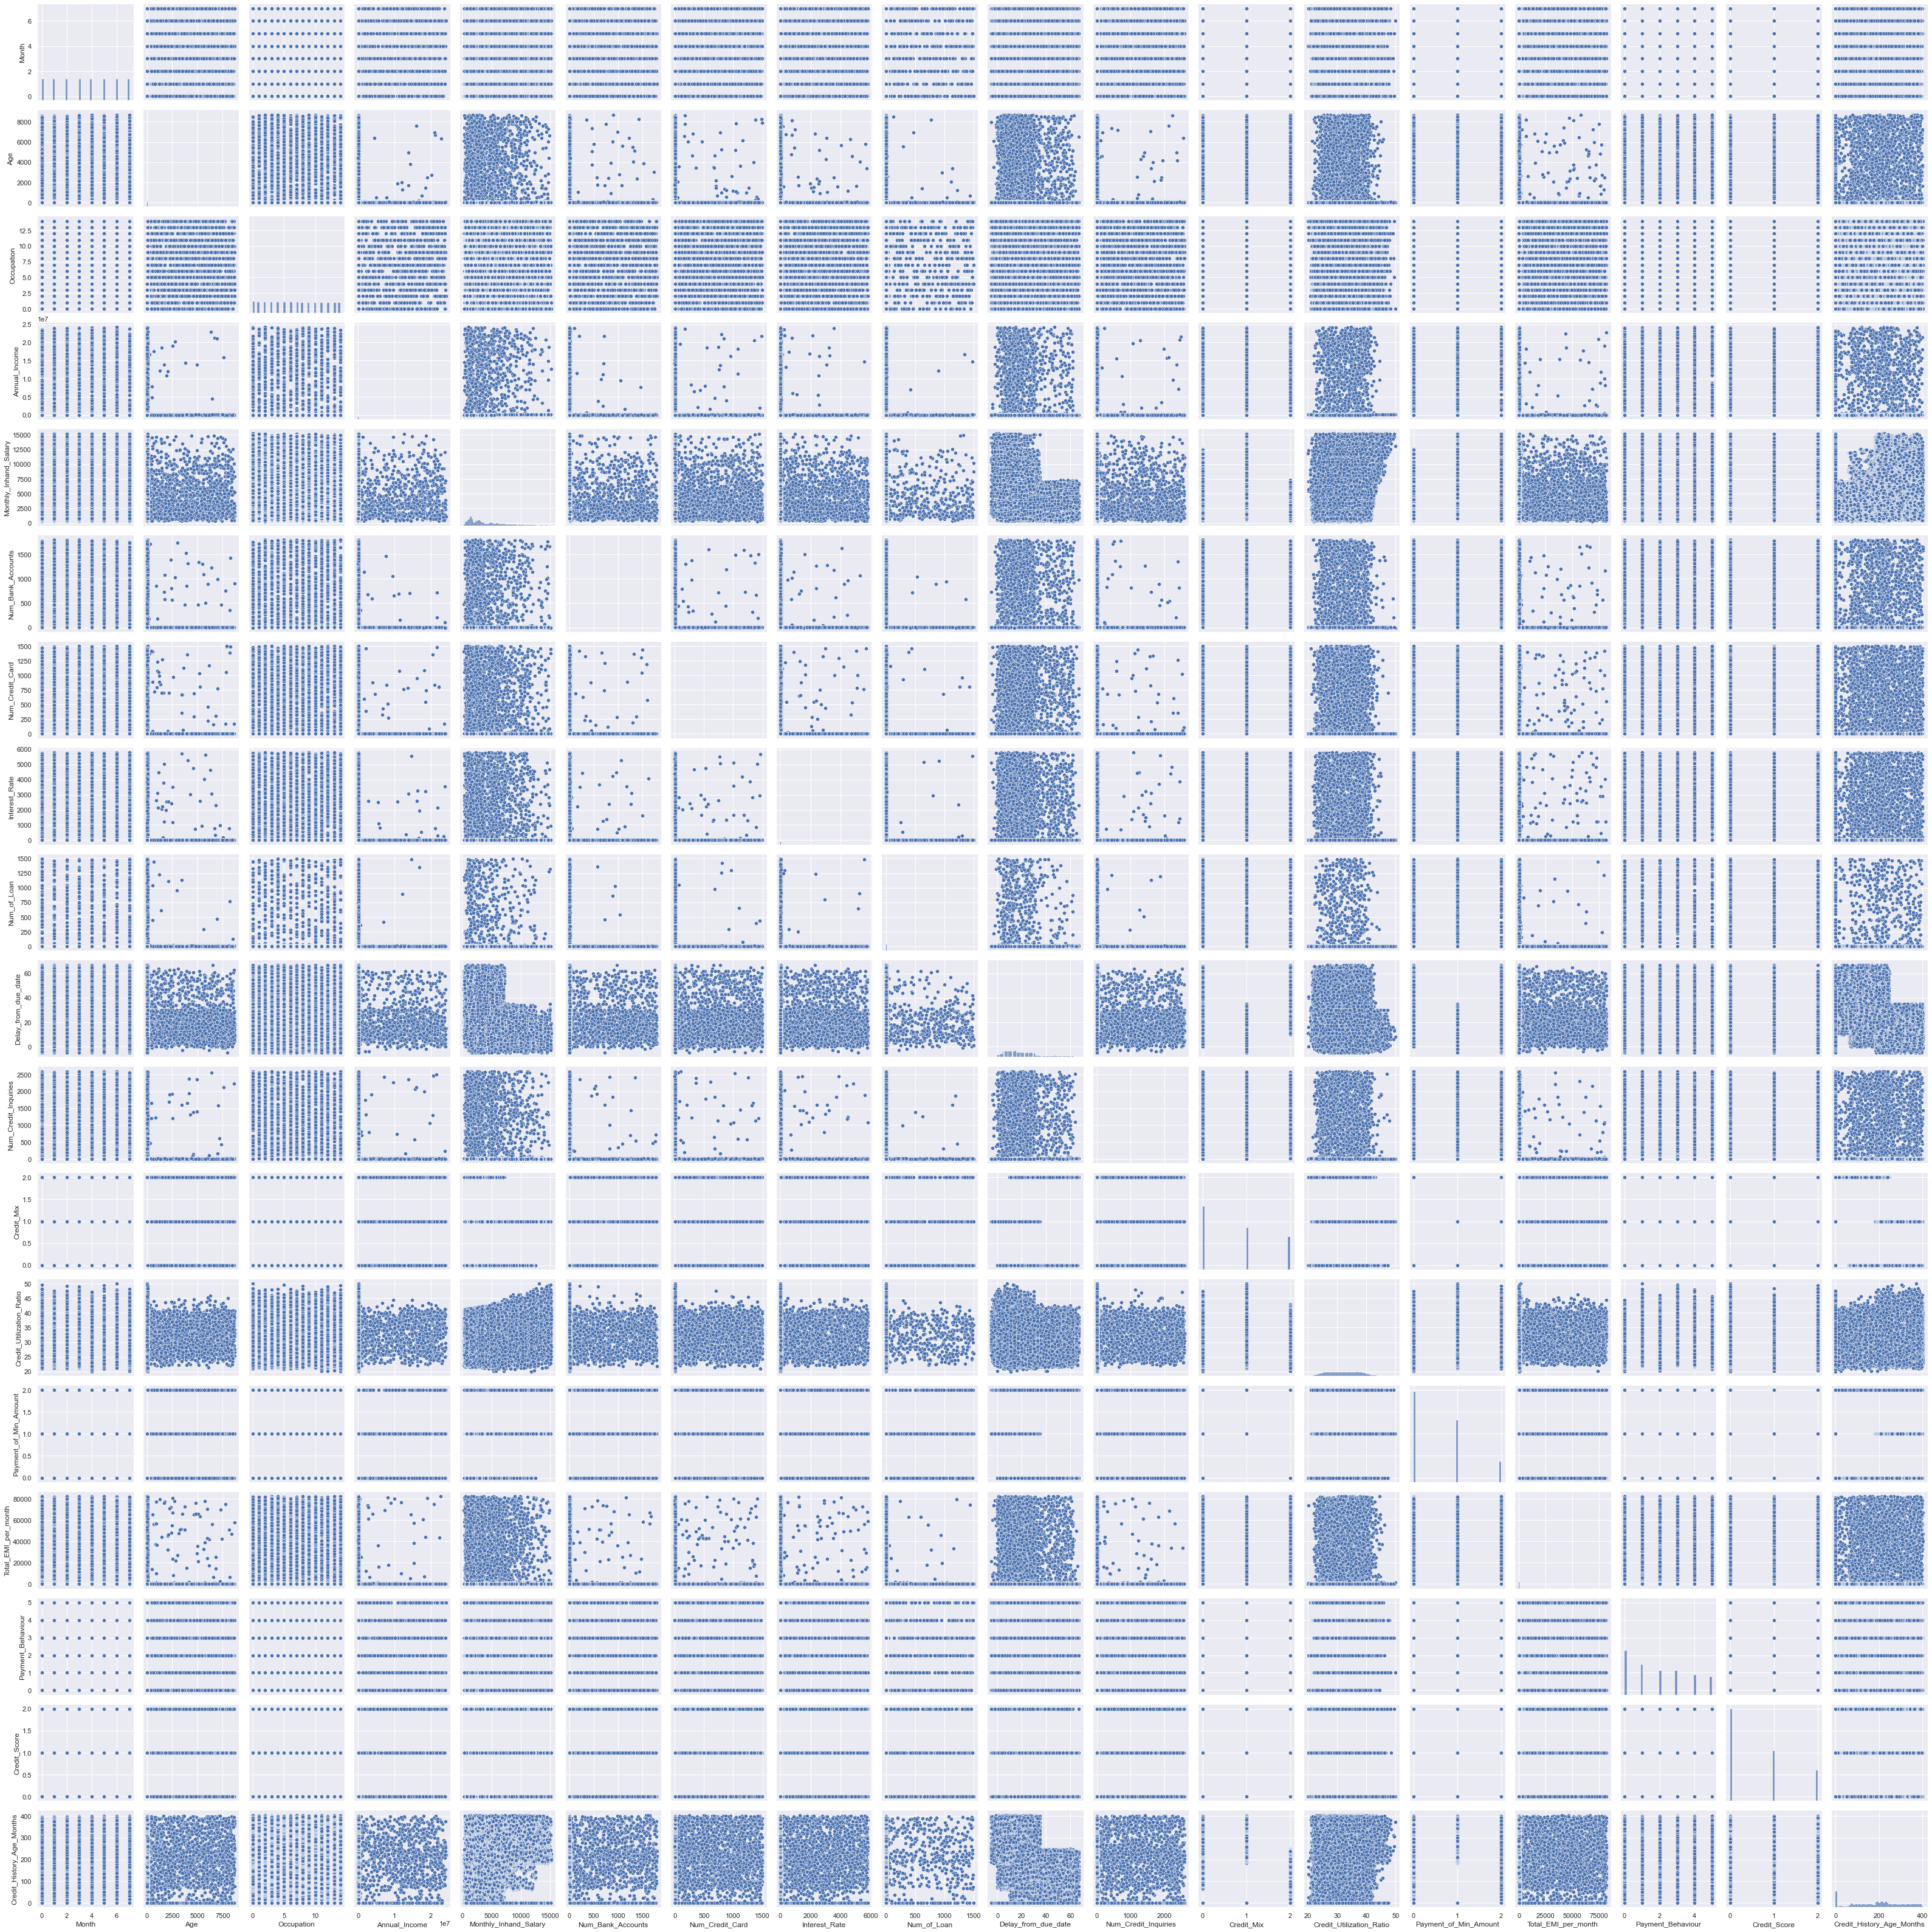

In [57]:
sns.pairplot(train)

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

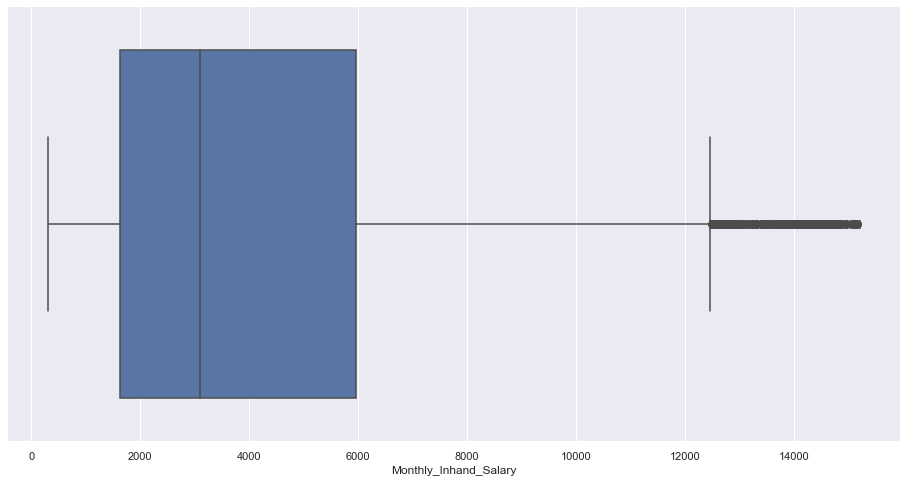

In [58]:
sns.boxplot(train['Monthly_Inhand_Salary'])

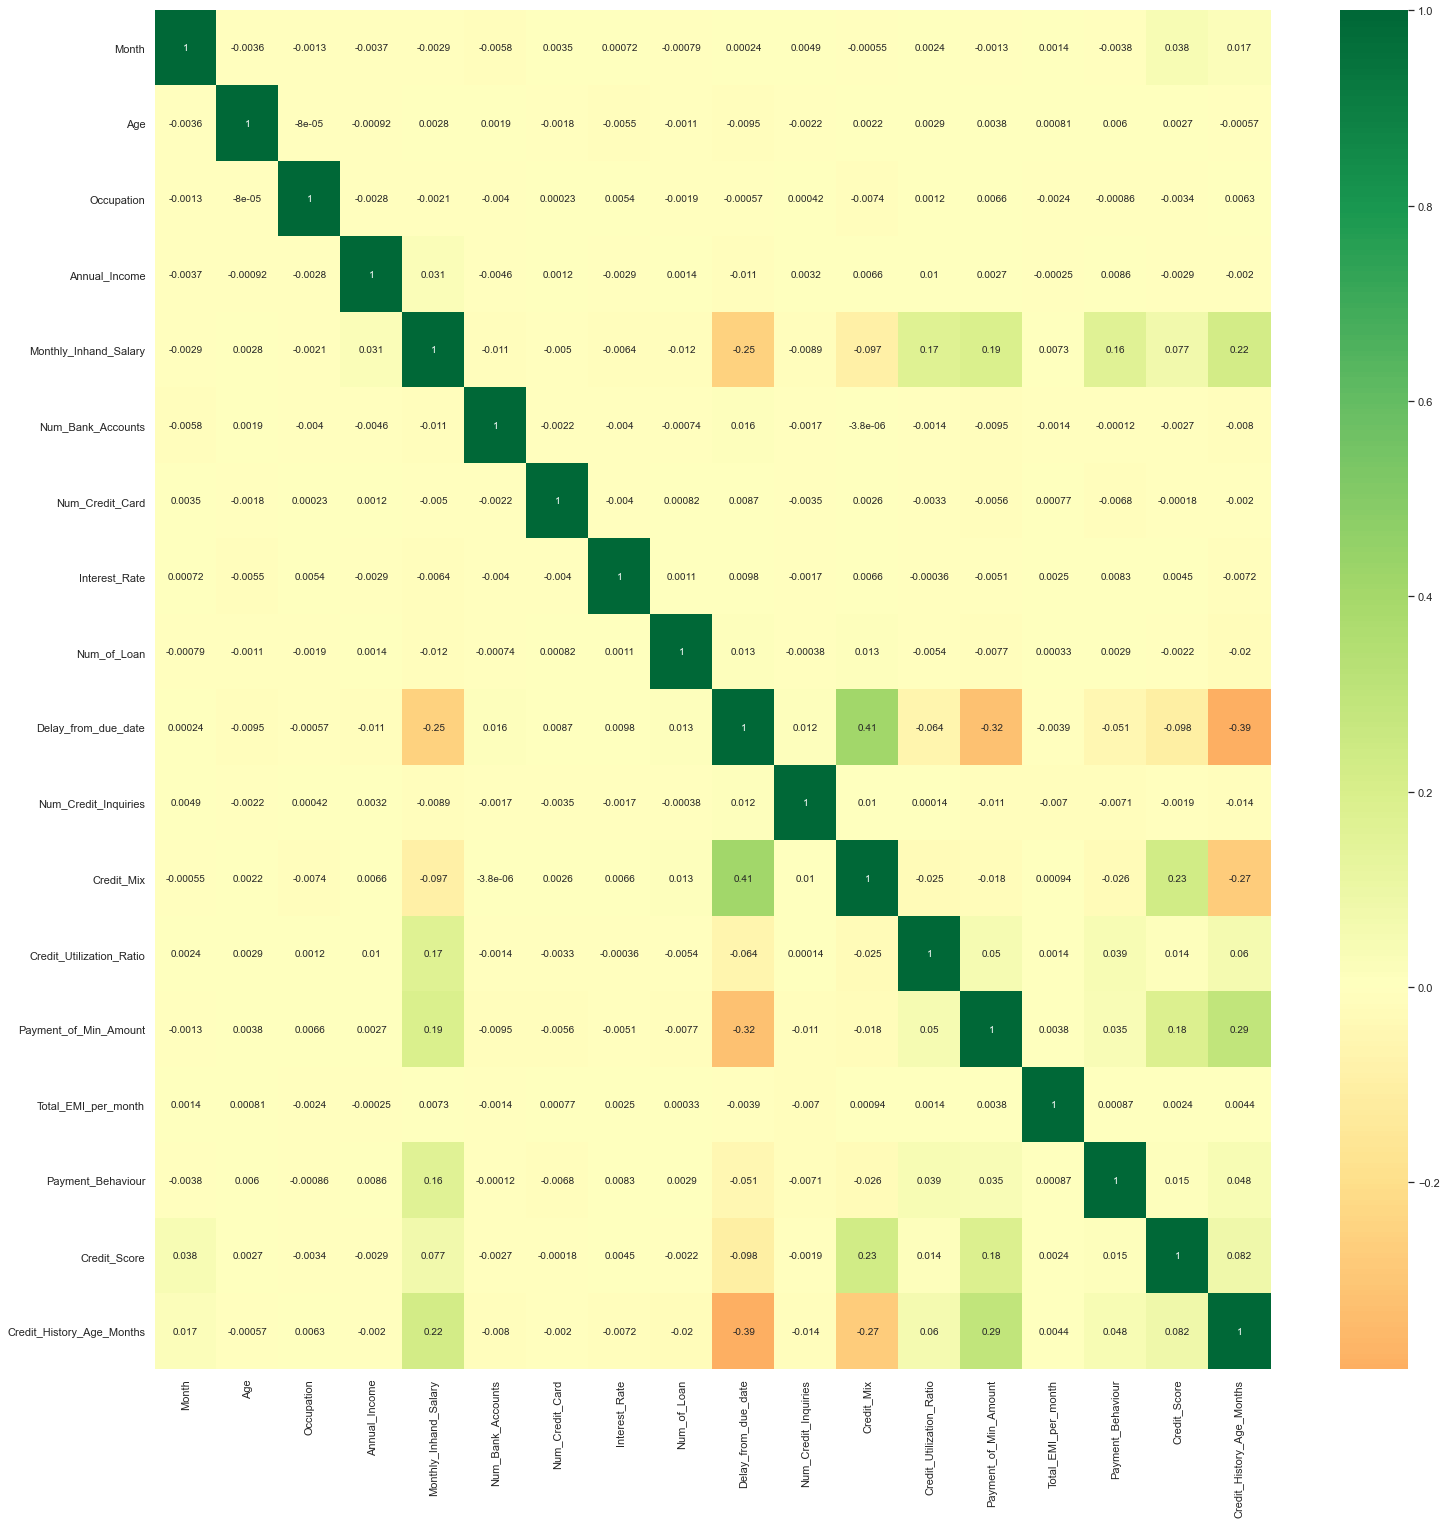

In [60]:
plt.figure(figsize=(25,25))
p = sns.heatmap(train.corr(), annot=True,cmap='RdYlGn',center=0) 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [44]:
train.isnull().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                          9985
Age                              0
SSN                              0
Occupation                    7062
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit             0
Num_Credit_Inquiries          1965
Credit_Mix                   20195
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour             7600
Monthly_Balance               1200
Credit_Score                     0
Credit_History_Age_M

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Train DataSet</h2>
</div>


#### * Imputation of "Num_Credit_Inquiries" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Occupation
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 0)), 'Num_Credit_Inquiries'] = 26
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 1)), 'Num_Credit_Inquiries'] = 25
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 2)), 'Num_Credit_Inquiries'] = 28
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 3)), 'Num_Credit_Inquiries'] = 28
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 4)), 'Num_Credit_Inquiries'] = 29
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 5)), 'Num_Credit_Inquiries'] = 28
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 6)), 'Num_Credit_Inquiries'] = 29
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 7)), 'Num_Credit_Inquiries'] = 32
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 8)), 'Num_Credit_Inquiries'] = 23
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 9)), 'Num_Credit_Inquiries'] = 30
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 10)), 'Num_Credit_Inquiries'] = 28
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 11)), 'Num_Credit_Inquiries'] = 29
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 12)), 'Num_Credit_Inquiries'] = 28
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 13)), 'Num_Credit_Inquiries'] = 23
train.loc[(train['Num_Credit_Inquiries'].isnull() & (train['Occupation'] == 14)), 'Num_Credit_Inquiries'] = 28

# Strategy 2:- Replace by population mean values where Occupation data is not available
train['Num_Credit_Inquiries']=train['Num_Credit_Inquiries'].fillna(train['Num_Credit_Inquiries'].mean(),axis=0)

print("******************************* Imputation of Num_Credit_Inquiries Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


#### * Imputation of "Monthly_Inhand_Salary" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Occupation
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 0)), 'Monthly_Inhand_Salary'] = 4222
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 1)), 'Monthly_Inhand_Salary'] = 4299
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 2)), 'Monthly_Inhand_Salary'] = 4144
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 3)), 'Monthly_Inhand_Salary'] = 4164
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 4)), 'Monthly_Inhand_Salary'] = 4240
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 5)), 'Monthly_Inhand_Salary'] = 4240
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 6)), 'Monthly_Inhand_Salary'] = 4003
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 7)), 'Monthly_Inhand_Salary'] = 4127
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 8)), 'Monthly_Inhand_Salary'] = 4279
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 9)), 'Monthly_Inhand_Salary'] = 4152
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 10)), 'Monthly_Inhand_Salary'] = 4226
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 11)), 'Monthly_Inhand_Salary'] = 4265
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 12)), 'Monthly_Inhand_Salary'] = 4257
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 13)), 'Monthly_Inhand_Salary'] = 4128
train.loc[(train['Monthly_Inhand_Salary'].isnull() & (train['Occupation'] == 14)), 'Monthly_Inhand_Salary'] = 4245

# Strategy 2:- Replace by population mean values where Occupation data is not available
train['Monthly_Inhand_Salary']=train['Monthly_Inhand_Salary'].fillna(train['Monthly_Inhand_Salary'].mean(),axis=0)

print("******************************* Imputation of Monthly_Inhand_Salary Variable Completed***************************")

print("--------------------------------------------------------------------------------------------------------------")


#### * Imputation of "Credit_Mix" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Delay_from_due_date
train.loc[(train['Credit_Mix'].isnull() & (train['Delay_from_due_date'] > 38)), 'Credit_Mix'] = 2
train.loc[(train['Credit_Mix'].isnull() & (train['Delay_from_due_date'] > 10)), 'Credit_Mix'] = 1
train.loc[(train['Credit_Mix'].isnull() & (train['Delay_from_due_date'] > 19)), 'Credit_Mix'] = 0

# Strategy 2:- Replace by population mode values where Delay_from_due_date data is not available
train['Credit_Mix']=train['Credit_Mix'].fillna(train['Credit_Mix'].mode()[0],axis=0)

print("******************************* Imputation of Credit_Mix Variable Completed***************************")

print("--------------------------------------------------------------------------------------------------------------")


#### * Imputation of "Num_of_Delayed_Payment" Variable

In [ ]:

train['Num_of_Delayed_Payment']=train['Num_of_Delayed_Payment'].fillna(0,axis=0)

print("******************************* Imputation of Num_of_Delayed_Payment Completed***************************")
print("*************************************************************************************************************")

#### * Imputation of "Amount_invested_monthly" Variable

In [ ]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('NaN',np.nan)
train['Amount_invested_monthly'] = np.where((train['Amount_invested_monthly'] == ''), '0', train['Amount_invested_monthly'])

train['Amount_invested_monthly']=train['Amount_invested_monthly'].fillna('0',axis=0)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype('float')

print("******************************* Imputation of Amount_invested_monthly Completed***************************")

print("*************************************************************************************************************")


#### * Imputation of "Monthly_Balance" Variable

In [ ]:
train['Monthly_Balance'] = np.where((train['Monthly_Balance'] == '__-333333333333333333333333333__'), '0', train['Monthly_Balance'])
train['Monthly_Balance'] = train['Monthly_Balance'].astype('float')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(train['Monthly_Balance'].median(),axis=0)

print("******************************* Imputation of Monthly_Balance Completed**************************************")

print("*************************************************************************************************************")

#### * Imputation of "Payment_Behaviour" Variable

In [677]:

train['Payment_Behaviour']=train['Payment_Behaviour'].fillna(train['Payment_Behaviour'].mode()[0],axis=0)

print("******************************* Imputation of Payment_Behaviour Completed**************************************")

print("*************************************************************************************************************")

-----------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [678]:
test.isnull().sum()

ID                               0
Customer_ID                      0
Month                        50000
Name                          5015
Age                              0
SSN                              0
Occupation                    3438
Annual_Income                    0
Monthly_Inhand_Salary         7498
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                  5704
Delay_from_due_date              0
Num_of_Delayed_Payment        3498
Changed_Credit_Limit             0
Num_Credit_Inquiries          1035
Credit_Mix                    9805
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            4470
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       2271
Payment_Behaviour             3800
Monthly_Balance                562
Credit_History_Age_Months        0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Test DataSet</h2>
</div>


#### * Imputation of "Num_Credit_Inquiries" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Occupation
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 0)), 'Num_Credit_Inquiries'] = 26
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 1)), 'Num_Credit_Inquiries'] = 25
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 2)), 'Num_Credit_Inquiries'] = 28
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 3)), 'Num_Credit_Inquiries'] = 28
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 4)), 'Num_Credit_Inquiries'] = 29
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 5)), 'Num_Credit_Inquiries'] = 28
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 6)), 'Num_Credit_Inquiries'] = 29
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 7)), 'Num_Credit_Inquiries'] = 32
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 8)), 'Num_Credit_Inquiries'] = 23
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 9)), 'Num_Credit_Inquiries'] = 30
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 10)), 'Num_Credit_Inquiries'] = 28
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 11)), 'Num_Credit_Inquiries'] = 29
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 12)), 'Num_Credit_Inquiries'] = 28
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 13)), 'Num_Credit_Inquiries'] = 23
test.loc[(test['Num_Credit_Inquiries'].isnull() & (test['Occupation'] == 14)), 'Num_Credit_Inquiries'] = 28

# Strategy 2:- Replace by population mean values where Occupation data is not available
test['Num_Credit_Inquiries']=test['Num_Credit_Inquiries'].fillna(test['Num_Credit_Inquiries'].mean(),axis=0)

print("******************************* Imputation of Num_Credit_Inquiries Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Monthly_Inhand_Salary" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Occupation

test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 0)), 'Monthly_Inhand_Salary'] = 4222
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 1)), 'Monthly_Inhand_Salary'] = 4299
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 2)), 'Monthly_Inhand_Salary'] = 4144
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 3)), 'Monthly_Inhand_Salary'] = 4164
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 4)), 'Monthly_Inhand_Salary'] = 4240
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 5)), 'Monthly_Inhand_Salary'] = 4240
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 6)), 'Monthly_Inhand_Salary'] = 4003
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 7)), 'Monthly_Inhand_Salary'] = 4127
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 8)), 'Monthly_Inhand_Salary'] = 4279
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 9)), 'Monthly_Inhand_Salary'] = 4152
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 10)), 'Monthly_Inhand_Salary'] = 4226
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 11)), 'Monthly_Inhand_Salary'] = 4265
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 12)), 'Monthly_Inhand_Salary'] = 4257
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 13)), 'Monthly_Inhand_Salary'] = 4128
test.loc[(test['Monthly_Inhand_Salary'].isnull() & (test['Occupation'] == 14)), 'Monthly_Inhand_Salary'] = 4245

# Strategy 2:- Replace by population mean values where Occupation data is not available

test['Monthly_Inhand_Salary']=test['Monthly_Inhand_Salary'].fillna(test['Monthly_Inhand_Salary'].mean(),axis=0)

print("******************************* Imputation of Monthly_Inhand_Salary Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Credit_Mix" Variable

In [ ]:
# Strategy 1:- Replace by mean values w.r.t. Delay_from_due_date

test.loc[(test['Credit_Mix'].isnull() & (test['Delay_from_due_date'] > 38)), 'Credit_Mix'] = 2
test.loc[(test['Credit_Mix'].isnull() & (test['Delay_from_due_date'] > 10)), 'Credit_Mix'] = 1
test.loc[(test['Credit_Mix'].isnull() & (test['Delay_from_due_date'] > 19)), 'Credit_Mix'] = 0

# Strategy 2:- Replace by population mode values where Delay_from_due_date data is not available

test['Credit_Mix']=test['Credit_Mix'].fillna(test['Credit_Mix'].mode()[0],axis=0)

print("******************************* Imputation of Credit_Mix Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Num_of_Delayed_Payment" Variable

In [ ]:

test['Num_of_Delayed_Payment']=test['Num_of_Delayed_Payment'].fillna(0,axis=0)

print("******************************* Imputation of Num_of_Delayed_Payment Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Amount_invested_monthly" Variable

In [ ]:
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].replace('NaN',np.nan)
test['Amount_invested_monthly'] = np.where((test['Amount_invested_monthly'] == ''), '0', test['Amount_invested_monthly'])

test['Amount_invested_monthly']=test['Amount_invested_monthly'].fillna('0',axis=0)
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].astype('float')

print("******************************* Imputation of Amount_invested_monthly Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Monthly_Balance" Variable

In [ ]:
test['Monthly_Balance'] = np.where((test['Monthly_Balance'] == '__-333333333333333333333333333__'), '0', test['Monthly_Balance'])
test['Monthly_Balance'] = test['Monthly_Balance'].astype('float')
test['Monthly_Balance'] = test['Monthly_Balance'].fillna(test['Monthly_Balance'].median(),axis=0)

print("******************************* Imputation of Monthly_Balance Completed**************************************")

print("*************************************************************************************************************")


#### * Imputation of "Payment_Behaviour" Variable

In [679]:

test['Payment_Behaviour']=test['Payment_Behaviour'].fillna(test['Payment_Behaviour'].mode()[0],axis=0)

print("******************************* Imputation of Payment_Behaviour Completed**************************************")

print("*************************************************************************************************************")


*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************
*************************************************************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [680]:

train = train.drop(['ID','Customer_ID','Name','SSN','Credit_History_Age'
                   ,'Month','Occupation', 'Type_of_Loan' ],axis=1)
print(train.head())
print("---------------------------------------------------------------------------------------------------------")
test = test.drop(['ID','Customer_ID','Name','SSN','Credit_History_Age','Month','Occupation'
                  , 'Type_of_Loan'],axis=1)
print(test.head())

print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Check Datatypes in Train and Test DataSet</h2>
</div>


In [685]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  int32  
 1   Annual_Income              100000 non-null  float64
 2   Monthly_Inhand_Salary      100000 non-null  float64
 3   Num_Bank_Accounts          100000 non-null  int64  
 4   Num_Credit_Card            100000 non-null  int64  
 5   Interest_Rate              100000 non-null  int64  
 6   Num_of_Loan                100000 non-null  float64
 7   Delay_from_due_date        100000 non-null  int64  
 8   Num_of_Delayed_Payment     100000 non-null  object 
 9   Changed_Credit_Limit       100000 non-null  object 
 10  Num_Credit_Inquiries       100000 non-null  float64
 11  Credit_Mix                 100000 non-null  float64
 12  Outstanding_Debt           100000 non-null  object 
 13  Credit_Utilization_Ratio   100

In [687]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].astype('int')
train['Changed_Credit_Limit'] = np.where((train['Changed_Credit_Limit'] == ''), '0', train['Changed_Credit_Limit'])
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype('float')
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype('float')

In [689]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        50000 non-null  int32  
 1   Annual_Income              50000 non-null  float64
 2   Monthly_Inhand_Salary      50000 non-null  float64
 3   Num_Bank_Accounts          50000 non-null  int64  
 4   Num_Credit_Card            50000 non-null  int64  
 5   Interest_Rate              50000 non-null  int64  
 6   Num_of_Loan                50000 non-null  float64
 7   Delay_from_due_date        50000 non-null  int64  
 8   Num_of_Delayed_Payment     50000 non-null  object 
 9   Changed_Credit_Limit       50000 non-null  object 
 10  Num_Credit_Inquiries       50000 non-null  float64
 11  Credit_Mix                 50000 non-null  float64
 12  Outstanding_Debt           50000 non-null  object 
 13  Credit_Utilization_Ratio   50000 non-null  flo

In [690]:
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].astype('int')
test['Changed_Credit_Limit'] = np.where((test['Changed_Credit_Limit'] == ''), '0', test['Changed_Credit_Limit'])
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].astype('float')
test['Outstanding_Debt'] = test['Outstanding_Debt'].astype('float')


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [692]:
train_temp,test_temp=train_test_split(train,test_size=0.2,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='Credit_Score'

features.remove(label)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nFEATURES ARE:-",features)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nLABELS ARE:-",label)

print("--------------------------------------------------------------------------------------------------------\n\n")

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]


Length of Original Data:- 100000 
Length of Train Data:- 80000 
Length of Test Data:- 20000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Random Forest Classifier</h2>
</div>

In [693]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train) 
print('Accuracy of Random Forest on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,rf.predict(X_test)),'\n')

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.78
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80     10585
           1       0.78      0.79      0.79      5826
           2       0.73      0.69      0.71      3589

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Advanced Random Forest Classifier</h2>
</div>

In [696]:
rf2 = RandomForestClassifier(max_depth= 40,
 max_features='auto',
 min_samples_leaf= 1,
 min_samples_split =2,
 n_estimators= 900,random_state=42)

rf2.fit(X_train,y_train) 

print('Accuracy of Random Forest on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf2.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,rf2.predict(X_test)),'\n')

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.78
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80     10585
           1       0.78      0.79      0.79      5826
           2       0.73      0.69      0.71      3589

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- XGBoost Classifier</h2>
</div>

In [706]:
import xgboost as xgb

xgb_cl2 = xgb.XGBClassifier(colsample_bytree=0.7,learning_rate= 0.07, max_depth= 8,min_child_weight= 5,
                         n_estimators= 1000,objective= 'reg:squaredlogerror',subsample= 0.9,random_state=4)

xgb_cl2.fit(X_train,y_train) 


print('Accuracy of Random Forest on training set: {:.2f}'
     .format(xgb_cl2.score(X_train, y_train)))


print('Accuracy of Random Forest on test set: {:.2f}'
     .format(xgb_cl2.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,xgb_cl2.predict(X_test)),'\n')
print("Model Score using Test Data Was:- 0.7454")

Accuracy of Random Forest on training set: 0.95
Accuracy of Random Forest on test set: 0.79
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80     10585
           1       0.78      0.79      0.79      5826
           2       0.75      0.72      0.73      3589

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- XGBoost Classifier_With Modified Parameters</h2>
</div>

In [710]:

import xgboost as xgb

xgb_cl = xgb.XGBClassifier(colsample_bytree=0.7,learning_rate= 0.07, max_depth= 8,min_child_weight= 5,
                         n_estimators= 3000,objective= 'reg:squaredlogerror',subsample= 0.9,random_state=4)


xgb_cl.fit(X_train,y_train) 


print('Accuracy of Random Forest on training set: {:.2f}'
     .format(xgb_cl.score(X_train, y_train)))


print('Accuracy of Random Forest on test set: {:.2f}'
     .format(xgb_cl.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,xgb_cl.predict(X_test)),'\n')
print("Model Score using Test Data Was:- 0.752875")

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.79
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.81      0.81     10585
           1       0.79      0.80      0.80      5826
           2       0.76      0.72      0.74      3589

    accuracy                           0.79     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- XGBoost Classifier_With Modified Parameters</h2>
</div>

In [714]:
xgb_cl3 = xgb.XGBClassifier(colsample_bytree=0.7,learning_rate= 0.07, max_depth= 8,min_child_weight= 5,
                         n_estimators= 5000,objective= 'reg:squaredlogerror',subsample= 0.9,random_state=4)

xgb_cl3.fit(X_train,y_train) 

print('Accuracy of Random Forest on training set: {:.2f}'
     .format(xgb_cl3.score(X_train, y_train)))

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(xgb_cl3.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,xgb_cl3.predict(X_test)),'\n')
print("Model Score using Test Data Was:- 0.7535")

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.79
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.81      0.81     10585
           1       0.79      0.80      0.79      5826
           2       0.76      0.72      0.74      3589

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Using Voting Classifier</h2>
</div>

In [721]:
clf1 = xgb_cl3
clf2 = xgb_cl

eclf1 = VotingClassifier(estimators=[('ExTrees', clf1), ('CatBoost', clf2)], voting='soft')
eclf1.fit(X_train, y_train)


print('Accuracy of Random Forest on training set: {:.2f}'
     .format(eclf1.score(X_train, y_train)))


print('Accuracy of Random Forest on test set: {:.2f}'
     .format(eclf1.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('Classification Report of the training data:\n\n',classification_report(y_test,eclf1.predict(X_test)),'\n')
print("Model Score using Test Data Was:- 0.7532")

Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.79
----------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.81      0.81     10585
           1       0.79      0.80      0.80      5826
           2       0.76      0.72      0.74      3589

    accuracy                           0.79     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [722]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 4
y_pred3 = xgb_cl.predict(x) 

# Prediction using Model 5

y_pred4 = xgb_cl3.predict(x) 

# Prediction using Model 6

y_pred5 = eclf1.predict(x) 

Print("Result of Model 5 were used for Submission")
y_pred = y_pred4
print(y_pred)

[2 2 2 ... 0 1 1]


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [723]:
test_F = pd.read_csv('C:/Users/PC/Pictures/HE/TU/test.csv')

df1=pd.DataFrame(y_pred,columns=['Credit_Score'])

# Reverse Mapping as per required format
df1['Credit_Score'] = df1['Credit_Score'].map({0:'Standard', 1:'Poor', 2:'Good'})

final_pred = pd.concat([test_F['ID'],df1], axis=1) 

final_pred.to_csv('C:/Users/PC/Pictures/HE/TU/Credit_Score_Model_XGB_0.7535_Aniket_Barphe.csv',index=False)

print("Process Completed")

Process Completed
